<a href="https://colab.research.google.com/github/Sritu123/Melanoma-Detection-Assignment/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import PIL
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
#connect to gdrive and mount it
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import os

drive_path = "/content/gdrive/MyDrive/CNN_DATASET"
files = os.listdir(drive_path)
print(files)

['CNN_assignment']


In [7]:
# get the train & test folder path location in gdrive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path("/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [8]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [9]:
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [10]:
#both test & train have same folders (disease folder ), now check the no. of datapoints in each folder

#total train dataset
total_train_data = len(list(data_dir_train.glob("*/*.jpg")))
total_train_data

2239

In [11]:
#total test dataset
total_test_data = len(list(data_dir_test.glob("*/*.jpg")))
total_test_data

118

In [12]:
# Create an empty DataFrame if not already created
data_detail_pd = pd.DataFrame(columns=["Dir_Name", "Total Image(Train)", "Total Percentage(Train)"])

for dir_name in os.listdir(data_dir_train):
    total_image_in_folder = len(list(data_dir_train.glob(dir_name + "/*.jpg")))
    df = pd.DataFrame([{"Dir_Name": dir_name,
                        "Total Image(Train)": total_image_in_folder,
                        "Total Percentage(Train)": round((total_image_in_folder / total_train_data) * 100, 2)}])

    data_detail_pd = pd.concat([data_detail_pd, df], ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")

<ipython-input-12-74637f0805e8>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_detail_pd = pd.concat([data_detail_pd, df], ignore_index=True)


In [13]:
# test data in each folders

for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Total Image(Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Total Percentage(Test)"]  = round((total_image_in_folder/total_train_data)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.63,16.0,0.71
melanoma,438,19.56,16.0,0.71
basal cell carcinoma,376,16.79,16.0,0.71
nevus,357,15.94,16.0,0.71
squamous cell carcinoma,181,8.08,16.0,0.71
vascular lesion,139,6.21,3.0,0.13
actinic keratosis,114,5.09,16.0,0.71
dermatofibroma,95,4.24,16.0,0.71
seborrheic keratosis,77,3.44,3.0,0.13


Observation : Melanoma has 20% of data in train and 0.71% data in test data set.

Highest Sample of Data : pigmented benign keratosis

Lowest Sample of Data : seborrheic **keratosis**

**DataSet Visualization**

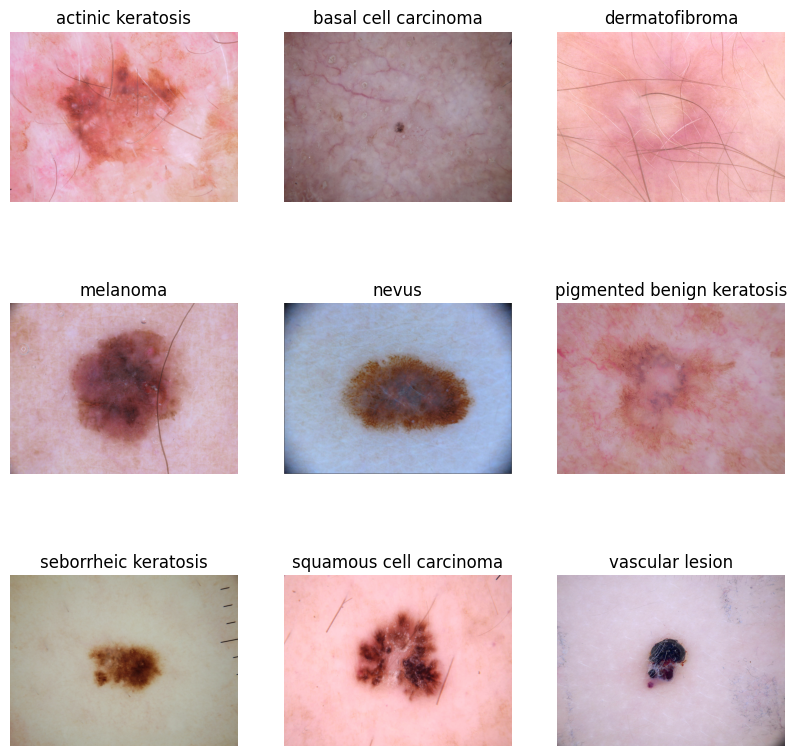

In [14]:
#get one image from each folder
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#get one file path from each folder
for dir_name in dir_train:
  path = str(data_dir_train) +"/"+ dir_name
  for file_name in glob.iglob(path+'/*.jpg', recursive=True):
    #print(file_name)
    file_path.append(file_name)
    class_name.append(dir_name)
    break


#display one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_name)):
  ax = plt.subplot(3,3,i+1)
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(class_name[i])

# Load Images For the CNN Model Inputs

In [15]:
#data loader params
batch_size = 32
img_height = 180
img_width = 180

In [16]:
# load train dataset in batches of size 32, resize the image into 180*180 pixel
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
# load validation dataset in batches of size 32, resize the image into 180*180 pixel
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size

)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [18]:
# its a multiclassifier so lets see its number of different labels / classes

num_classes = len(val_ds.class_names)
num_classes

9

In [19]:
#class names
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Configure Dataset for Performance

In [20]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# M1 Model (Base Model)

In [21]:
#model design ( CNN Model)

model = Sequential([
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [23]:
#model design summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.1856 - loss: 2.2372 - val_accuracy: 0.2461 - val_loss: 2.0106
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - accuracy: 0.3026 - loss: 1.9325 - val_accuracy: 0.4407 - val_loss: 1.6562
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3605 - loss: 1.7939 - val_accuracy: 0.4541 - val_loss: 1.6041
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4802 - loss: 1.5042 - val_accuracy: 0.5302 - val_loss: 1.4540
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5407 - loss: 1.2755 - val_accuracy: 0.4362 - val_loss: 1.7646
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5111 - loss: 1.3475 - val_accuracy: 0.5257 - val_loss: 1.4043
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5882 - loss: 1.1525 - val_accuracy: 0.5369 - val_loss: 1.3830
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6099 - loss: 1.1092 - val_accuracy: 0.5257 - 

Text(0.5, 1.0, 'Training & Validation Loss')

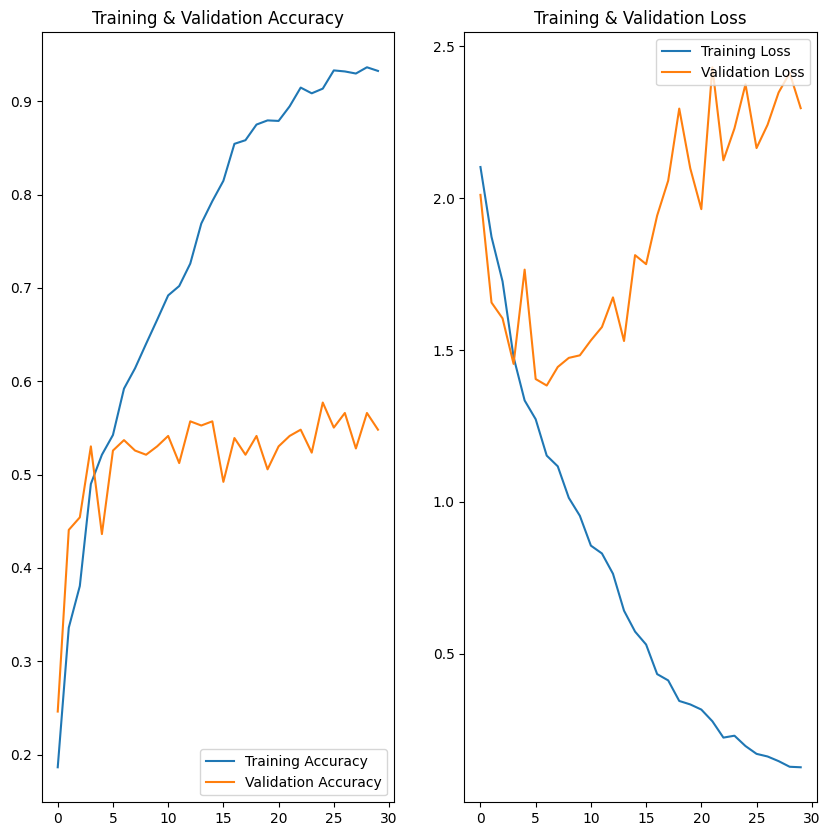

In [25]:
# accuracy & loss graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

# Observation

*   Training Accuracy : Training Accuracy is high
*   Validation Accuracy : Validation accuracy is low compared to the Training  
    Accuracy so , its not a good model.
*   Training Loss : Its decerasing
*   Validation Loss : its increasing per epoch so not a good fit




# M2 Model ( With Augumentation)

In [29]:
data_augument = keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

In [30]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [33]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2260 - loss: 2.2481 - val_accuracy: 0.3043 - val_loss: 1.8862
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3925 - loss: 1.6845 - val_accuracy: 0.3826 - val_loss: 1.6958
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4306 - loss: 1.5684 - val_accuracy: 0.4966 - val_loss: 1.4153
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5013 - loss: 1.4261 - val_accuracy: 0.4564 - val_loss: 1.5591
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4918 - loss: 1.4153 - val_accuracy: 0.4609 - val_loss: 1.4956
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5251 - loss: 1.3140 - val_accuracy: 0.5056 - val_loss: 1.4560
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5262 - loss: 1.2908 - val_accuracy: 0.5101 - val_loss: 1.3786
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5334 - loss: 1.2700 - val_accuracy: 0.4787 - v

# **Observation : just by adding augumentation it wont help us , so lets add the drop out as well**

# M3 Model ( With Augumentation & droupout)

In [34]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.2), # droupout layer
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [37]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1905 - loss: 2.3955 - val_accuracy: 0.2841 - val_loss: 1.8377
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3626 - loss: 1.7610 - val_accuracy: 0.4452 - val_loss: 1.6008
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4506 - loss: 1.5539 - val_accuracy: 0.4720 - val_loss: 1.5633
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4743 - loss: 1.4801 - val_accuracy: 0.4944 - val_loss: 1.5182
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4926 - loss: 1.4060 - val_accuracy: 0.4810 - val_loss: 1.5213
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5220 - loss: 1.3595 - val_accuracy: 0.5145 - val_loss: 1.4311
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5106 - loss: 1.3579 - val_accuracy: 0.4989 - val_loss: 1.3712
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5197 - loss: 1.3255 - val_accuracy: 0.5168 - v

### slight increase in accuracy, so lets add droupout to More **Layers**

# M4 Model ( with Augumentation + Droupouts ( to additional Layers))

In [38]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer

         layers.Dense(num_classes)
])

In [39]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [40]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1482 - loss: 2.9368 - val_accuracy: 0.1499 - val_loss: 2.0759
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1803 - loss: 2.0628 - val_accuracy: 0.2416 - val_loss: 2.0314
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2758 - loss: 1.9579 - val_accuracy: 0.3669 - val_loss: 1.7926
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3784 - loss: 1.7332 - val_accuracy: 0.4385 - val_loss: 1.6082
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4069 - loss: 1.6555 - val_accuracy: 0.3893 - val_loss: 1.6776
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4111 - loss: 1.5993 - val_accuracy: 0.4720 - val_loss: 1.5576
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4465 - loss: 1.5925 - val_accuracy: 0.4676 - val_loss: 1.5614
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4539 - loss: 1.5360 - val_accuracy: 0.5168 - v

Text(0.5, 1.0, 'Training & Validation Loss')

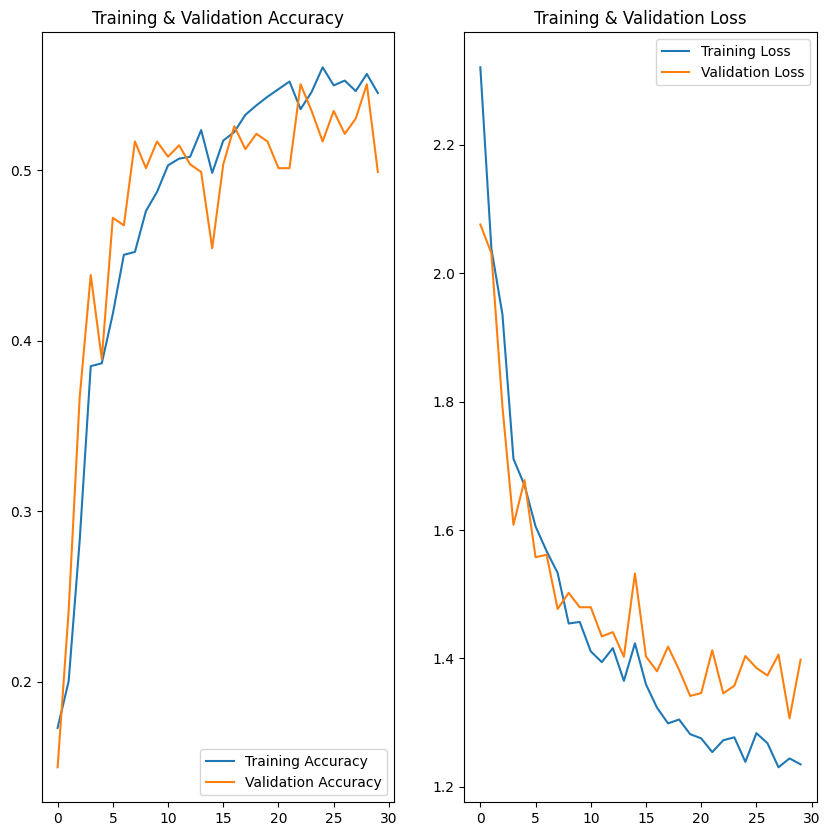

In [41]:
# accuracy & loss graph

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

Observation : Now model has no Overfitting : as both train & validation accuracy **overlap**

# M5 model : Additional Experiment with Dropouts

In [42]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         #layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dropout(0.25), # droupout layer

         layers.Dense(num_classes)
])


In [43]:
#model design overview

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081,193 (7.94 MB)

 Trainable params: 2,081,193 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [45]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2163 - loss: 2.0910 - val_accuracy: 0.2304 - val_loss: 1.9828
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2717 - loss: 1.9911 - val_accuracy: 0.3624 - val_loss: 1.7412
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3538 - loss: 1.7597 - val_accuracy: 0.3870 - val_loss: 1.7131
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3916 - loss: 1.6886 - val_accuracy: 0.4832 - val_loss: 1.5684
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4236 - loss: 1.6090 - val_accuracy: 0.4765 - val_loss: 1.5315
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4477 - loss: 1.5322 - val_accuracy: 0.4765 - val_loss: 1.4982
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4500 - loss: 1.4986 - val_accuracy: 0.4743 - val_loss: 1.5145
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5010 - loss: 1.4404 - val_accuracy: 0.4944 - v

# M6 Model ( Augumetation + Batch Normalization + Droupouts )

In [46]:
model = Sequential([
         data_augument,
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Conv2D(128,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.BatchNormalization(),
         layers.Dropout(0.25), # droupout layer

         layers.Flatten(),
         layers.Dense(128,activation="relu"),

         layers.Dense(num_classes)
])

In [47]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 90, 90, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 45, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 22, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,082,153 (7.94 MB)

 Trainable params: 2,081,673 (7.94 MB)

 Non-trainable params: 480 (1.88 KB)

In [48]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [49]:
#train the model : run the model on train & validation set
epochs = 30
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.3044 - loss: 2.7409 - val_accuracy: 0.1499 - val_loss: 4.7113
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4436 - loss: 1.5907 - val_accuracy: 0.0872 - val_loss: 5.4066
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4827 - loss: 1.5413 - val_accuracy: 0.1499 - val_loss: 11.3650
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4978 - loss: 1.4424 - val_accuracy: 0.1499 - val_loss: 9.7782
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5041 - loss: 1.4074 - val_accuracy: 0.1834 - val_loss: 7.3922
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5060 - loss: 1.3535 - val_accuracy: 0.1924 - val_loss: 7.3906
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5409 - loss: 1.3026 - val_accuracy: 0.1409 - val_loss: 7.9346
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5507 - loss: 1.2590 - val_accuracy: 0.3043 - 

### Observation : No Additional improvement, its due to very less data points so lets increase the data points

# Using Another Way of Augmentation to Handle Class **Imbalance**

Using Augmentor Pipeline ( Add additional Images )

In [50]:
# install Augmentor
!pip install Augmentor

In [51]:
import Augmentor

In [52]:
# add 500 new sample to each folder
for class_name in data_detail_pd.index:
  #print(class_name)
  p = Augmentor.Pipeline(str(data_dir_train)+"/"+class_name,save_format='.jpg')
  p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x786831149A50>: 100%|██████████| 500/500 [00:16<00:00, 30.76 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78683052D5D0>: 100%|██████████| 500/500 [00:16<00:00, 30.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78683119A490>: 100%|██████████| 500/500 [00:18<00:00, 26.78 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78683018E890>: 100%|██████████| 500/500 [01:36<00:00,  5.20 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x78685056E010>: 100%|██████████| 500/500 [01:25<00:00,  5.88 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7867F0985390>: 100%|██████████| 500/500 [00:17<00:00, 28.21 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78685015F710>: 100%|██████████| 500/500 [00:36<00:00, 13.74 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78680198A190>: 100%|██████████| 500/500 [00:17<00:00, 28.36 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x786830467750>: 100%|██████████| 500/500 [00:17<00:00, 28.85 Samples/s]


In [53]:
data_detail_pd.index

Index(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
       'melanoma', 'nevus', 'pigmented benign keratosis',
       'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
      dtype='object', name='Dir_Name')

In [54]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [55]:
#count of additional images added

additional_images_added = len(list(data_dir_train.glob("*/output/*jpg")))
additional_images_added

4500

Now train the Model on the Additional Images Obtained via Augmentor ( 4500 Images) + Original Images ( 2239 Images)

In [56]:
# we need to reinitalize the train_ds & val_ds
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [57]:
#validation dataset

val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [58]:
# AutoTune & cache for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [59]:
# Model Defination

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [60]:
# model compilation

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [61]:
#model design

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 90, 90, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 45, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,993 (15.22 MB)

 Trainable params: 3,989,897 (15.22 MB)

 Non-trainable params: 96 (384.00 B)

In [62]:
# run the model to fit train datapoint and check accuracy on validation dataset

epochs = 30
history = model.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - accuracy: 0.2895 - loss: 3.6343 - val_accuracy: 0.0898 - val_loss: 2.3314
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 70s 210ms/step - accuracy: 0.4848 - loss: 1.3523 - val_accuracy: 0.1886 - val_loss: 2.1628
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.5812 - loss: 1.1162 - val_accuracy: 0.3816 - val_loss: 1.9786
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - accuracy: 0.6557 - loss: 0.9401 - val_accuracy: 0.6058 - val_loss: 1.1107
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.7302 - loss: 0.7457 - val_accuracy: 0.6875 - val_loss: 0.8841
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.7734 - loss: 0.6003 - val_accuracy: 0.6214 - val_loss: 1.0874
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.8159 - loss: 0.4846 - val_accuracy: 0.6711 - val_loss: 1.0436
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.8333 - loss: 0

Text(0.5, 1.0, 'Training & Validation Loss')

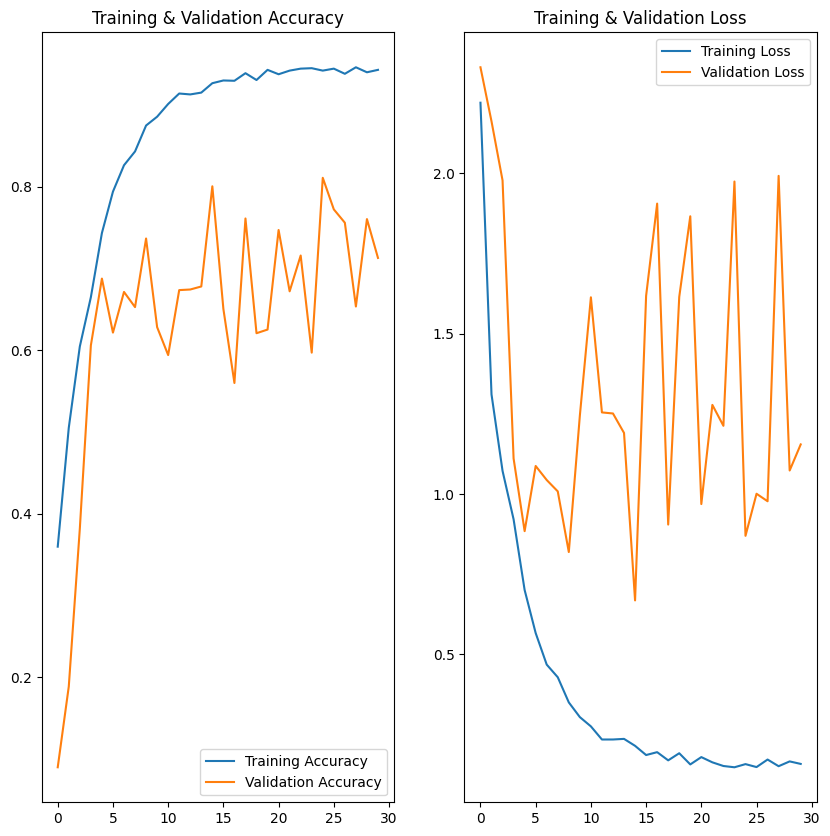

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

# Now we have good train accuracy ( 94% ) and Validation Accuracy (84%)

# Analysis on Test Data

In [64]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)


Found 118 files belonging to 9 classes.


In [65]:
loss , accuracy = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 0.3075 - loss: 7.1567


In [66]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.3050847351551056


# Prediction on New Test Data

In [67]:
melanoma_path = "/content/gdrive/MyDrive/CNN_DATASET/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
tf.Tensor(
[9.3542668e-04 1.1669814e-13 1.6638658e-05 1.7132636e-02 7.8353477e-01
 1.9838047e-01 8.3152658e-13 9.5753863e-11 5.7393569e-23], shape=(9,), dtype=float32)


In [68]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to nevus with a 78.35 percent confidence.
